In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import glob
import os


import missingno as miss
import holidays
import datetime as dt
from holidays import country_holidays
import statsmodels.tsa.api as tsa
SEED = 321
np.random.seed(SEED)
pd.set_option('display.max_columns', 100)
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
sns.set_context("talk", font_scale=0.9)

In [3]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    ax.set_xticklabel_format(style = 'plain')
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [61]:
import seaborn as sns
with sns.plotting_context('poster')    
   

SyntaxError: invalid syntax (764413904.py, line 2)

In [5]:
path = r"C:/Users/dell/Documents/Data Enrichment assignments/Project-Part-4/Data/Chicago"
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)


In [7]:
holidays= pd.read_csv("C:/Users/dell/Downloads/Holidays-Chicago - Holidays-Chicago (1).csv", low_memory = False)
crime_df = df
#crime_df.info()
crime_df.head()

ID                    Date            Primary Type  \
0  1324743  01/01/2001 01:00:00 PM                GAMBLING   
1  1319931  01/01/2001 01:00:00 PM                 BATTERY   
2  6154338  01/01/2001 01:00:00 PM                   THEFT   
3  1318099  01/01/2001 01:00:00 AM                 BATTERY   
4  1311732  01/01/2001 01:00:00 PM  PUBLIC PEACE VIOLATION   

                     Description     Location Description  Arrest  Domestic  \
0            ILLEGAL ILL LOTTERY                   STREET    True     False   
1                         SIMPLE                RESIDENCE   False     False   
2  FINANCIAL ID THEFT: OVER $300                RESIDENCE   False     False   
3                         SIMPLE  RESIDENCE PORCH/HALLWAY   False      True   
4                   ARSON THREAT                RESIDENCE   False     False   

   Beat  District  Ward  Latitude  Longitude  
0   313      3.00   NaN     41.78     -87.61  
1   825      8.00   NaN     41.78     -87.68  
2   831      8.00 15.00     41.77     -87.70  
3   214      2.00   NaN     41.82     -87.62  
4  1433     14.00   NaN     41.91     -87.67

# Stakeholder Questions

1. Crimes Across the Years:
 - Is the total number of crimes increasing or decreasing across the years?
 
 - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
 
 
 2. Comparing AM vs. PM Rush Hour:
- Are crimes more common during AM rush hour or PM rush hour?
         - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
         
       - You can consider any crime that occurred between 4 -7 PM as PM rush hour. 
        
 - What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
 
- Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
        
3. Comparing Months:

- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?



In [8]:
#Question 1
crime_df['DateTime'] = pd.to_datetime(crime_df['Date'],format = '%m/%d/%Y %H:%M:%S %p')                                   


In [9]:
crime_df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10580
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Latitude                 87559
Longitude                87559
DateTime                     0
dtype: int64

In [10]:
crime_df['year'] = crime_df['DateTime'].dt.year
crime_df['month'] = crime_df['DateTime'].dt.month_name()
crime_df['day of month'] = crime_df['DateTime'].dt.day
crime_df['day of week'] = crime_df['DateTime'].dt.day_name()
crime_df['hour'] = crime_df['DateTime'].dt.hour
crime_df['minutes'] = crime_df['DateTime'].dt.minute
crime_df

ID                    Date            Primary Type  \
0         1324743  01/01/2001 01:00:00 PM                GAMBLING   
1         1319931  01/01/2001 01:00:00 PM                 BATTERY   
2         6154338  01/01/2001 01:00:00 PM                   THEFT   
3         1318099  01/01/2001 01:00:00 AM                 BATTERY   
4         1311732  01/01/2001 01:00:00 PM  PUBLIC PEACE VIOLATION   
...           ...                     ...                     ...   
7815538  13094350  06/03/2023 12:53:00 AM                 BATTERY   
7815539  13098974  06/03/2023 12:55:00 AM           OTHER OFFENSE   
7815540  13094272  06/03/2023 12:55:00 AM                 BATTERY   
7815541  13094820  06/03/2023 12:58:00 PM       WEAPONS VIOLATION   
7815542  13097391  06/03/2023 12:59:00 AM                   THEFT   

                           Description     Location Description  Arrest  \
0                  ILLEGAL ILL LOTTERY                   STREET    True   
1                               SIMPLE                RESIDENCE   False   
2        FINANCIAL ID THEFT: OVER $300                RESIDENCE   False   
3                               SIMPLE  RESIDENCE PORCH/HALLWAY   False   
4                         ARSON THREAT                RESIDENCE   False   
...                                ...                      ...     ...   
7815538           AGGRAVATED - HANDGUN                   STREET   False   
7815539        HARASSMENT BY TELEPHONE                RESIDENCE   False   
7815540                         SIMPLE               RESTAURANT    True   
7815541  UNLAWFUL POSSESSION - HANDGUN                   STREET    True   
7815542                  FROM BUILDING                   STREET   False   

         Domestic  Beat  District  Ward  Latitude  Longitude  \
0           False   313      3.00   NaN     41.78     -87.61   
1           False   825      8.00   NaN     41.78     -87.68   
2           False   831      8.00 15.00     41.77     -87.70   
3            True   214      2.00   NaN     41.82     -87.62   
4           False  1433     14.00   NaN     41.91     -87.67   
...           ...   ...       ...   ...       ...        ...   
7815538     False  1122     11.00 27.00     41.89     -87.72   
7815539      True  1133     11.00 24.00     41.87     -87.71   
7815540     False   221      2.00  4.00     41.81     -87.61   
7815541     False  2223     22.00 21.00     41.72     -87.64   
7815542     False   915      9.00 11.00     41.83     -87.64   

                   DateTime  year    month  day of month day of week  hour  \
0       2001-01-01 01:00:00  2001  January             1      Monday     1   
1       2001-01-01 01:00:00  2001  January             1      Monday     1   
2       2001-01-01 01:00:00  2001  January             1      Monday     1   
3       2001-01-01 01:00:00  2001  January             1      Monday     1   
4       2001-01-01 01:00:00  2001  January             1      Monday     1   
...                     ...   ...      ...           ...         ...   ...   
7815538 2023-06-03 12:53:00  2023     June             3    Saturday    12   
7815539 2023-06-03 12:55:00  2023     June             3    Saturday    12   
7815540 2023-06-03 12:55:00  2023     June             3    Saturday    12   
7815541 2023-06-03 12:58:00  2023     June             3    Saturday    12   
7815542 2023-06-03 12:59:00  2023     June             3    Saturday    12   

         minutes  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
7815538       53  
7815539       55  
7815540       55  
7815541       58  
7815542       59  

[7815543 rows x 19 columns]

In [15]:
crime_df= crime_df.drop(columns=['ID','Location Description','Arrest','Domestic', 'Beat','Ward','Latitude','Longitude'])
crime_df.head()

Date            Primary Type  \
DateTime                                                              
2001-01-01 01:00:00  01/01/2001 01:00:00 PM                GAMBLING   
2001-01-01 01:00:00  01/01/2001 01:00:00 PM                 BATTERY   
2001-01-01 01:00:00  01/01/2001 01:00:00 PM                   THEFT   
2001-01-01 01:00:00  01/01/2001 01:00:00 AM                 BATTERY   
2001-01-01 01:00:00  01/01/2001 01:00:00 PM  PUBLIC PEACE VIOLATION   

                                       Description  District  year    month  \
DateTime                                                                      
2001-01-01 01:00:00            ILLEGAL ILL LOTTERY      3.00  2001  January   
2001-01-01 01:00:00                         SIMPLE      8.00  2001  January   
2001-01-01 01:00:00  FINANCIAL ID THEFT: OVER $300      8.00  2001  January   
2001-01-01 01:00:00                         SIMPLE      2.00  2001  January   
2001-01-01 01:00:00                   ARSON THREAT     14.00  2001  January   

                     day of month day of week  hour  minutes  
DateTime                                                      
2001-01-01 01:00:00             1      Monday     1        0  
2001-01-01 01:00:00             1      Monday     1        0  
2001-01-01 01:00:00             1      Monday     1        0  
2001-01-01 01:00:00             1      Monday     1        0  
2001-01-01 01:00:00             1      Monday     1        0

In [11]:
crime_df['hour'].value_counts()

12    895181
9     763016
10    749596
8     703021
11    694721
1     618693
7     618690
2     602938
3     585089
6     552366
4     523265
5     508967
Name: hour, dtype: int64

In [47]:
rush_hour_df = crime_df.groupby('Primary Type')['hour'].value_counts().sort_index()

In [48]:
rush_plot= rush_hour_df.to_frame('# of Crimes').reset_index()
rush_plot

Primary Type  hour  # of Crimes
0                ARSON     1         1350
1                ARSON     2         1370
2                ARSON     3         1284
3                ARSON     4         1220
4                ARSON     5         1052
..                 ...   ...          ...
408  WEAPONS VIOLATION     8        10605
409  WEAPONS VIOLATION     9        11451
410  WEAPONS VIOLATION    10        11869
411  WEAPONS VIOLATION    11        12173
412  WEAPONS VIOLATION    12        11571

[413 rows x 3 columns]

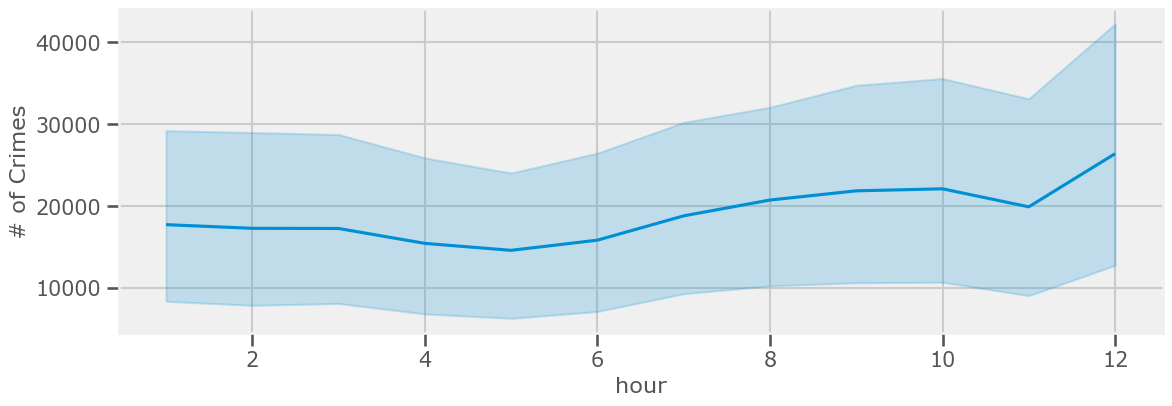

In [49]:
plt.figure(figsize=(12,4));
ax = sns.lineplot(data=rush_plot,x='hour', y='# of Crimes')

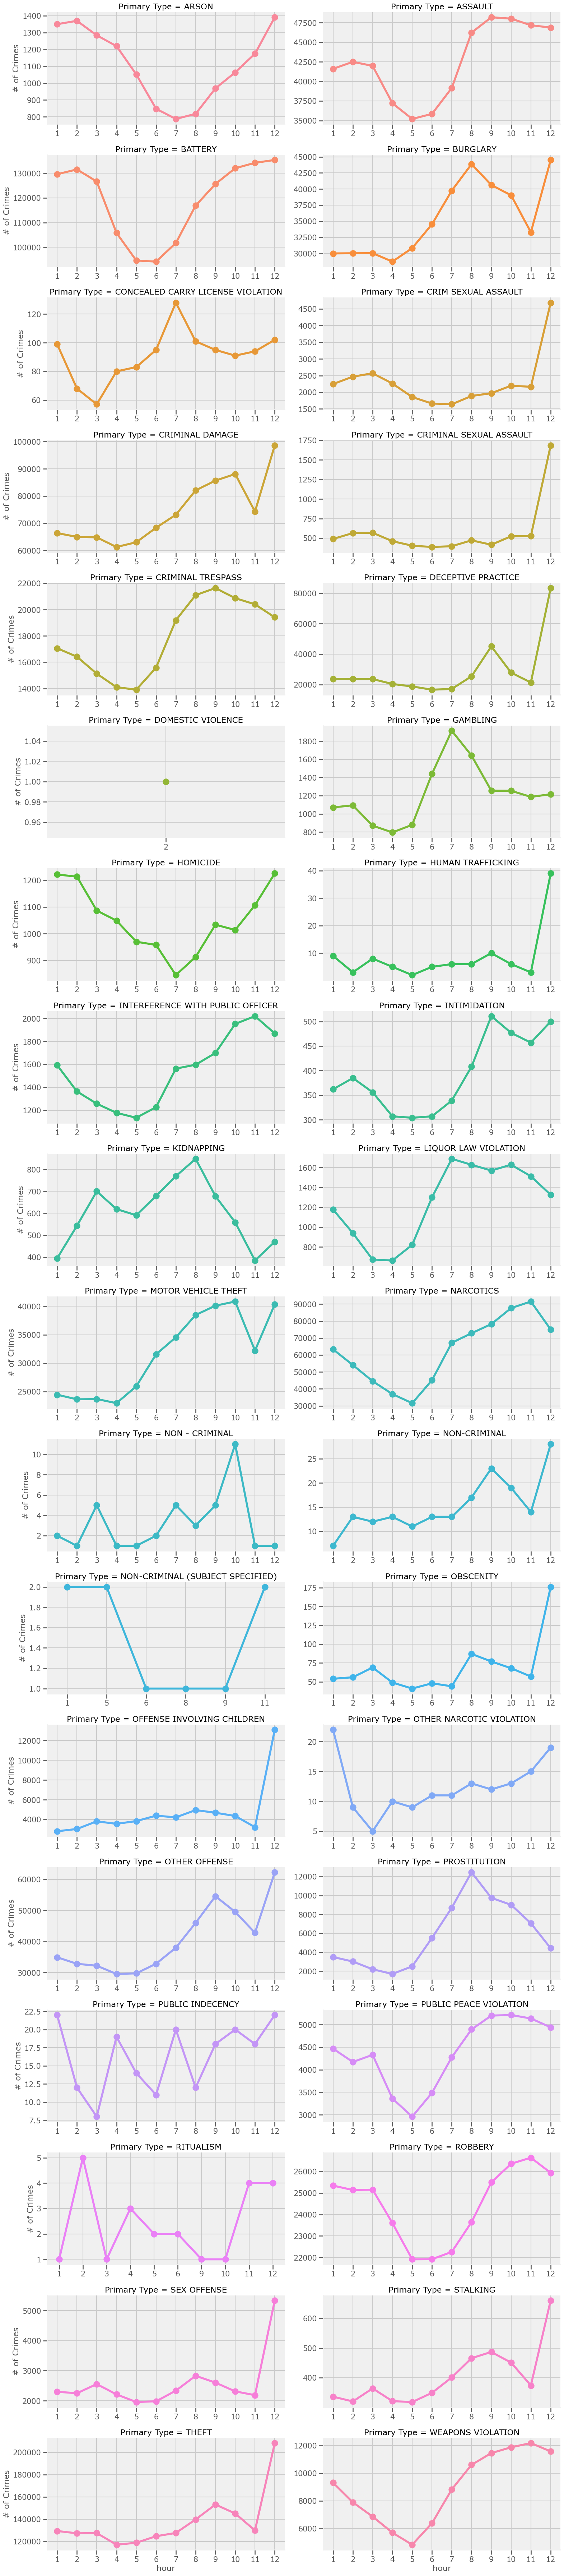

In [51]:
g = sns.catplot(data= rush_plot, x='hour', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)

[ax.grid(axis='x') for ax in g.axes];

In [52]:
rush_val_counts= crime_df.groupby('Primary Type')['hour'].value_counts().sort_index()
rush_val_counts

Primary Type       hour
ARSON              1        1350
                   2        1370
                   3        1284
                   4        1220
                   5        1052
                           ...  
WEAPONS VIOLATION  8       10605
                   9       11451
                   10      11869
                   11      12173
                   12      11571
Name: hour, Length: 413, dtype: int64

In [53]:
crime='homicide'
rush_list = rush_val_counts.index.levels[0]
rush_list

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

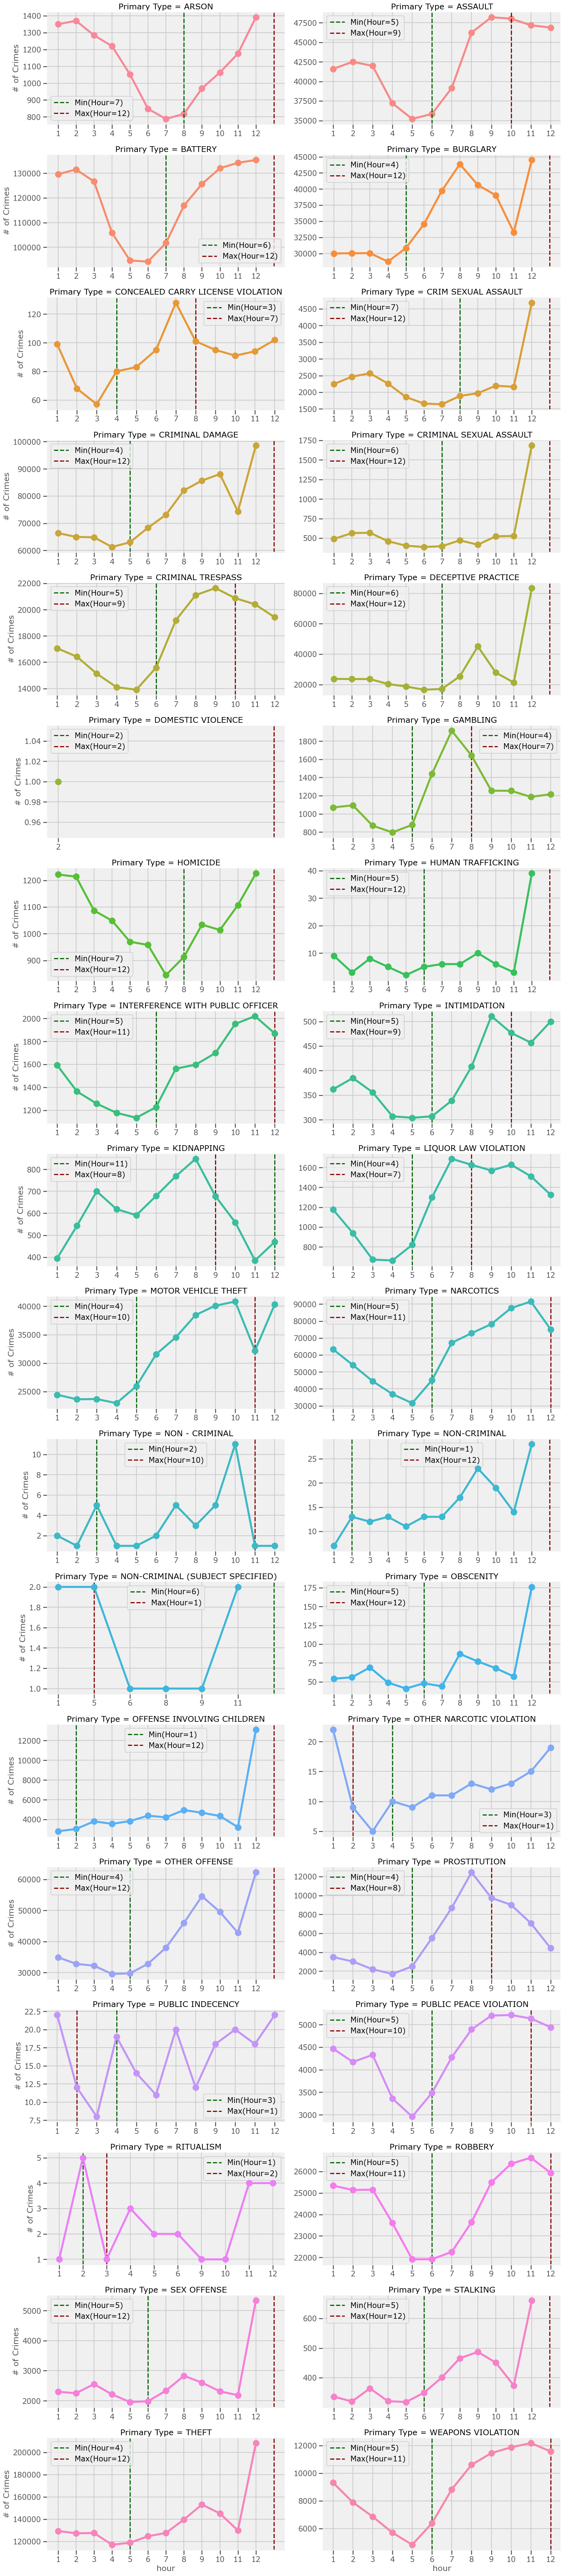

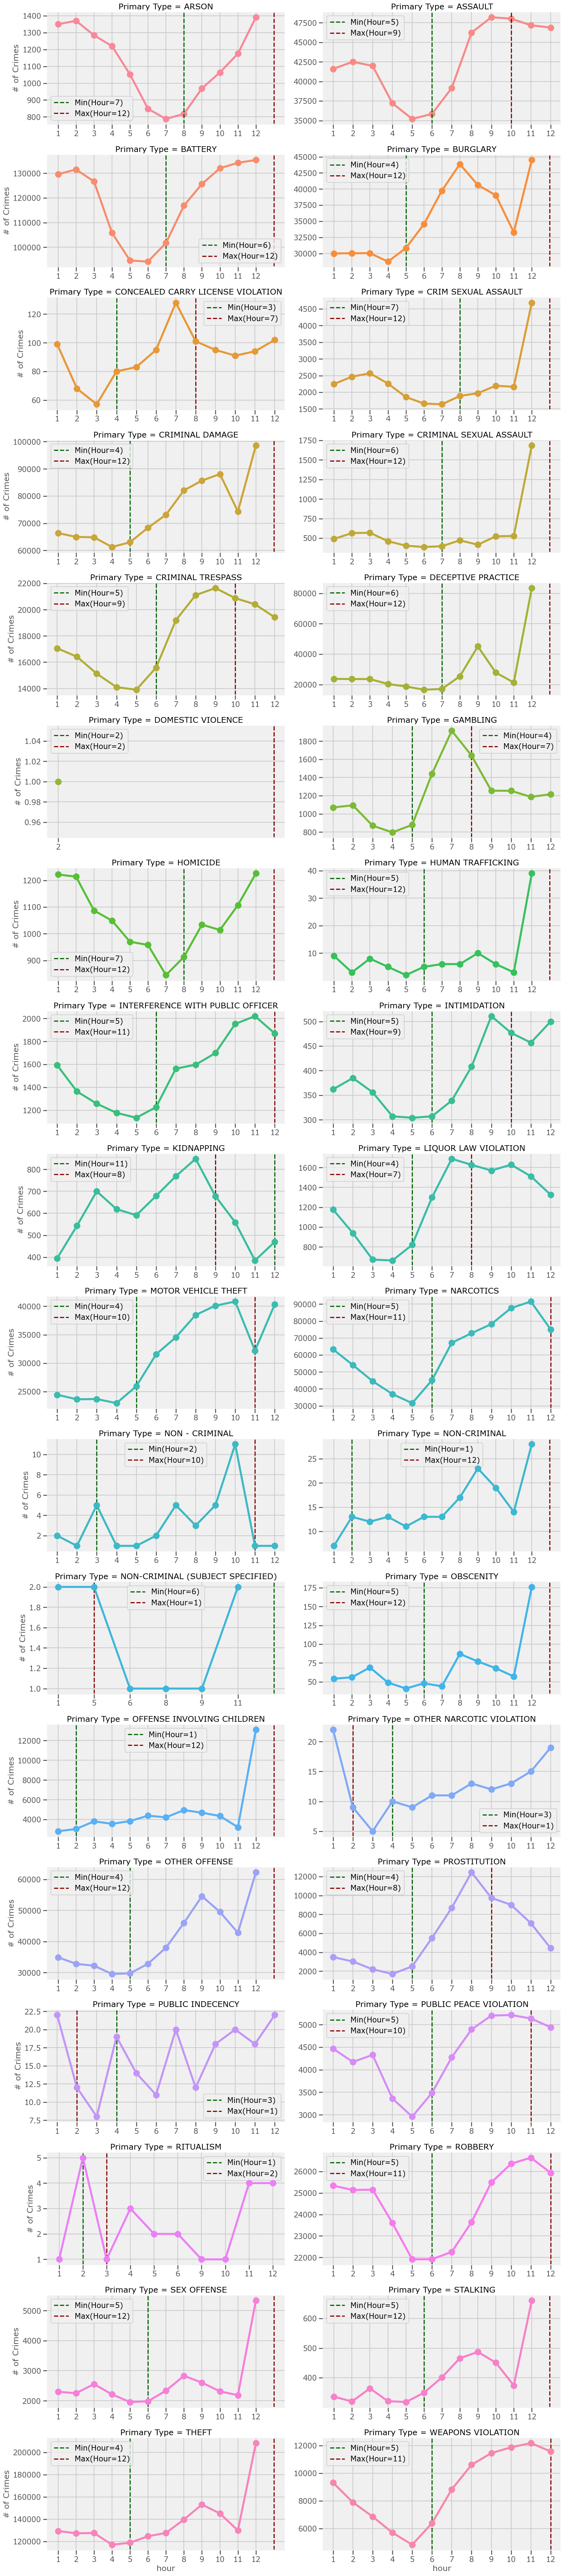

In [56]:
g = sns.catplot(data=rush_plot, x='hour', y='# of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2,
            aspect=2, height=4,
           kind='point',sharey=False,sharex=False);
## loop throught the axes dict
for col, ax in g.axes_dict.items():
    
    ## Extract the idx min and idxmax from the val counts
    min_, max_ = rush_val_counts.loc[col].agg(['idxmin','idxmax'])
    
    ## add vlines for both and SAVE THE LINE and a label to use in legend
    ln1 = ax.axvline(min_, color='darkgreen',ls='--')
    lab1 = f'Min(Hour={min_})'
    
    ln2 = ax.axvline(max_,color='darkred',ls='--')
    lab2 = f'Max(Hour={max_})'
    
    ## manually add legend using list of ln1 and ln2 and a list of labels
    ax.legend( [ln1,ln2], [lab1,lab2] )
    ## add x grid
    ax.grid(axis='x')
    
g.fig

What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

1.)non crime , ritualism, homicide, other narcotics, and public indecency 

2.weapons violation, theft,sex offence, robbery, public peace violation

3. Motor vehicle thefts are more common during pm rush hour. 

In [57]:
#Question 3
crime_months= crime_df.groupby('Primary Type')['month'].value_counts().sort_index()
crime_months


Primary Type       month    
ARSON              April         1134
                   August        1182
                   December       923
                   February       840
                   January        963
                                ...  
WEAPONS VIOLATION  March         8801
                   May          10759
                   November      7952
                   October       9190
                   September     9435
Name: month, Length: 415, dtype: int64

In [58]:
plot_crimes= crime_months.to_frame('# of crimes').reset_index()
plot_crimes

Primary Type      month  # of crimes
0                ARSON      April         1134
1                ARSON     August         1182
2                ARSON   December          923
3                ARSON   February          840
4                ARSON    January          963
..                 ...        ...          ...
410  WEAPONS VIOLATION      March         8801
411  WEAPONS VIOLATION        May        10759
412  WEAPONS VIOLATION   November         7952
413  WEAPONS VIOLATION    October         9190
414  WEAPONS VIOLATION  September         9435

[415 rows x 3 columns]

In [67]:
g = sns.catplot(data=plot_crimes, x='month', y='# of crimes',
                kind='point',aspect=4, height=6,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
                
[ax.grid(axis='x') for ax in g.axes];

The months with the most crime were July, may, aug, oct,all crimes follow this trend besides: 

non crim subject specified, non criminal,obscenity ,other offense , ritualism

In [68]:
crime_df.head()

Date            Primary Type  \
DateTime                                                              
2001-01-01 01:00:00  01/01/2001 01:00:00 PM                GAMBLING   
2001-01-01 01:00:00  01/01/2001 01:00:00 PM                 BATTERY   
2001-01-01 01:00:00  01/01/2001 01:00:00 PM                   THEFT   
2001-01-01 01:00:00  01/01/2001 01:00:00 AM                 BATTERY   
2001-01-01 01:00:00  01/01/2001 01:00:00 PM  PUBLIC PEACE VIOLATION   

                                       Description  District  year    month  \
DateTime                                                                      
2001-01-01 01:00:00            ILLEGAL ILL LOTTERY      3.00  2001  January   
2001-01-01 01:00:00                         SIMPLE      8.00  2001  January   
2001-01-01 01:00:00  FINANCIAL ID THEFT: OVER $300      8.00  2001  January   
2001-01-01 01:00:00                         SIMPLE      2.00  2001  January   
2001-01-01 01:00:00                   ARSON THREAT     14.00  2001  January   

                     day of month day of week  hour  minutes  
DateTime                                                      
2001-01-01 01:00:00             1      Monday     1        0  
2001-01-01 01:00:00             1      Monday     1        0  
2001-01-01 01:00:00             1      Monday     1        0  
2001-01-01 01:00:00             1      Monday     1        0  
2001-01-01 01:00:00             1      Monday     1        0

In [69]:
crime_df['District'].value_counts()

8.00     525118
11.00    501419
6.00     457068
7.00     451737
25.00    444649
4.00     443694
3.00     396353
12.00    387446
9.00     381762
2.00     370060
19.00    350891
18.00    350794
5.00     346308
10.00    336716
15.00    334803
1.00     316246
14.00    302354
16.00    261674
22.00    256166
24.00    236144
17.00    225592
20.00    138255
31.00       243
21.00         4
Name: District, dtype: int64

In [70]:
district_df= crime_df.groupby('District',as_index = False).value_counts().sort_index().copy()
district_df

District                    Date Primary Type  \
0            1.00  07/13/2006 08:43:00 AM    NARCOTICS   
1            1.00  10/16/2006 06:28:00 AM    NARCOTICS   
2            1.00  08/03/2006 10:27:10 AM    NARCOTICS   
3            1.00  08/28/2006 07:30:00 AM    NARCOTICS   
4            1.00  06/12/2006 10:15:00 PM    NARCOTICS   
...           ...                     ...          ...   
7680230     31.00  01/03/2020 11:10:00 AM      BATTERY   
7680231     31.00  01/03/2009 12:20:00 PM    NARCOTICS   
7680232     31.00  01/02/2008 02:12:00 PM    NARCOTICS   
7680233     31.00  01/01/2018 12:01:00 AM  SEX OFFENSE   
7680234     31.00  12/30/2009 12:00:00 PM        THEFT   

                            Description  year     month  day of month  \
0          ATTEMPT POSSESSION NARCOTICS  2006      July            13   
1          ATTEMPT POSSESSION NARCOTICS  2006   October            16   
2          ATTEMPT POSSESSION NARCOTICS  2006    August             3   
3          ATTEMPT POSSESSION NARCOTICS  2006    August            28   
4          ATTEMPT POSSESSION NARCOTICS  2006      June            12   
...                                 ...   ...       ...           ...   
7680230         DOMESTIC BATTERY SIMPLE  2020   January             3   
7680231              MANU/DELIVER:CRACK  2009   January             3   
7680232              MANU/DELIVER:CRACK  2008   January             2   
7680233  SEXUAL EXPLOITATION OF A CHILD  2018   January             1   
7680234                  $500 AND UNDER  2009  December            30   

        day of week  hour  minutes  count  
0          Thursday     8       43     23  
1            Monday     6       28     23  
2          Thursday    10       27     20  
3            Monday     7       30     19  
4            Monday    10       15     19  
...             ...   ...      ...    ...  
7680230      Friday    11       10      1  
7680231    Saturday    12       20      1  
7680232   Wednesday     2       12      1  
7680233      Monday    12        1      1  
7680234   Wednesday    12        0      1  

[7680235 rows x 11 columns]

In [71]:
district = district_df.groupby('District')['count'].sum().sort_values()
district

District
21.00         4
31.00       243
20.00    138255
17.00    225592
24.00    236144
22.00    256166
16.00    261674
14.00    302354
1.00     316246
15.00    334803
10.00    336716
5.00     346308
18.00    350794
19.00    350891
2.00     370060
9.00     381762
12.00    387446
3.00     396353
4.00     443694
25.00    444649
7.00     451737
6.00     457068
11.00    501419
8.00     525118
Name: count, dtype: int64

In [72]:
district.idxmax()


8.0

In [73]:
district.idxmin()


21.0

In [74]:
num = district_df['count'].sum()
num

7815496

###  the district with the most crimes is district 8 the district with the least crimes is district 21.0

C:\Users\dell\AppData\Local\Temp\ipykernel_25508\2799629109.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data= district_df,x = 'District', y = 'count', order = district.index, ci = None)


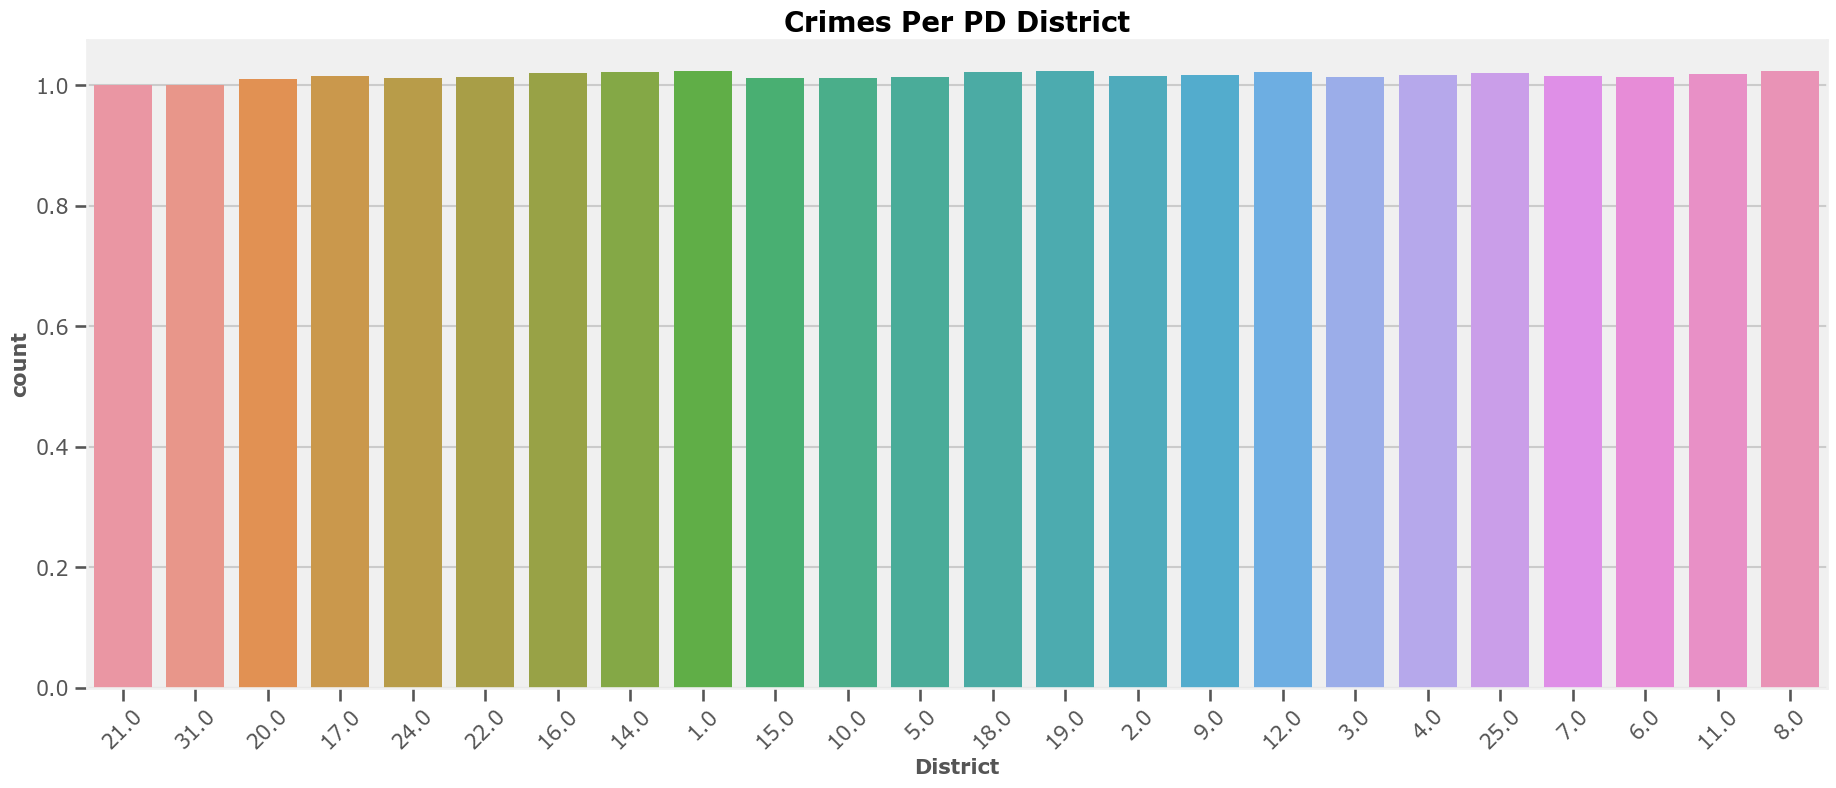

In [92]:
unstacked = district_df.unstack(level=1)
unstacked
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.barplot(data= district_df,x = 'District', y = 'count', order = district.index, ci = None)
plt.xticks(rotation = 45)
ax.set_title('Crimes Per PD District', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('District', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('count', fontsize = 15, fontweight = 'bold');